In [78]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

from os import walk

#path1 = '../../../data/2018_01_10/'
path1 = '../../../data/2018_01_12/'

In [2]:
verbose = True

f = [] # empty list of files
for (dirpath, dirnames, filenames) in walk(path1):
    f.extend(filenames)

# sort list alphabetically
f.sort()
# remove non .tsv files from list
f = [x for x in f if x[-4:]==".tsv"]

# get length of filename list
f_len = len(f)

if verbose:
    for ii in range(f_len):
        print(ii, f[ii])

0 1558-VOA_sweep_full304.tsv
1 1603-VOA_sweep_up302.tsv
2 1604-VOA_sweep_full300.tsv
3 1609-VOA_sweep_down299.tsv
4 1611-VOA_sweep_full297.tsv
5 1617-VOA_sweep_full273.tsv
6 1622-VOA_sweep_up271.tsv
7 1623-VOA_sweep_full270.tsv
8 1629-VOA_sweep_down269.tsv
9 1636-VOA_sweep_full249.tsv
10 1640-VOA_sweep_up247.tsv
11 1641-VOA_sweep_full246.tsv
12 1645-VOA_sweep_down246.tsv
13 1647-VOA_sweep_full244.tsv
14 1648-VOA_sweep_full226.tsv
15 1658-VOA_sweep_up224.tsv
16 1700-VOA_sweep_full221.tsv
17 1704-VOA_sweep_down220.tsv
18 1705-VOA_sweep_full219.tsv
19 1707-VOA_sweep_full200.tsv
20 1710-VOA_sweep_up199.tsv
21 1711-VOA_sweep_full199.tsv
22 1716-VOA_sweep_full197.tsv
23 1724-VOA_sweep_down195.tsv
24 1725-VOA_sweep_full194.tsv
25 BAD_1715-VOA_sweep_down198.tsv


In [3]:
# exclude/add file section
f = [x for x in f if x[14:19]=="_full"]
#f = [f[1], f[3], f[6], f[8], f[10], f[12], f[15], f[17], f[20], f[23]]
f_len = len(f)

if verbose:
    print()
    for ii in range(f_len):
        print(ii, f[ii])


0 1558-VOA_sweep_full304.tsv
1 1604-VOA_sweep_full300.tsv
2 1611-VOA_sweep_full297.tsv
3 1617-VOA_sweep_full273.tsv
4 1623-VOA_sweep_full270.tsv
5 1636-VOA_sweep_full249.tsv
6 1641-VOA_sweep_full246.tsv
7 1647-VOA_sweep_full244.tsv
8 1648-VOA_sweep_full226.tsv
9 1700-VOA_sweep_full221.tsv
10 1705-VOA_sweep_full219.tsv
11 1707-VOA_sweep_full200.tsv
12 1711-VOA_sweep_full199.tsv
13 1716-VOA_sweep_full197.tsv
14 1725-VOA_sweep_full194.tsv


In [4]:
d1 = {} # empty data dictionary

for ff in range(f_len):
    temp = np.loadtxt(path1+f[ff])[0:3,0:2].reshape(6).tolist()
    temp[3:] = np.int_(temp[3:]) # convert to integer
    temp.append(temp[1]<temp[2]) # append direction_up value
    d1[ff] = ( temp, np.loadtxt(path1+f[ff])[3:,0:2] )
    del temp
    
print('data shapes:')
for ii, dd in d1.items():
    print(dd[1][:,:].shape, '-->\t %d loops, %d samples per loop' %(dd[1][:,:].shape[0]/dd[0][4]/2,2*dd[0][4]))
    print('\t\t',dd[0])

k = 0.2
print('\nnormalization constant k = %.1f'%k)

data shapes:
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.304, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.3, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.297, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.273, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.27, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.249, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.246, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.244, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.226, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.221, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 samples per loop
		 [1552.219, 0.0, 1.0, 1, 101, 100, True]
(202, 2) -->	 1 loops, 202 sample

In [5]:
# define settings for plots
colors = (('xkcd:orange', 'xkcd:red'),#
          ('xkcd:blue', 'xkcd:purple'),#
          ('xkcd:green', 'xkcd:lime'),#
         )

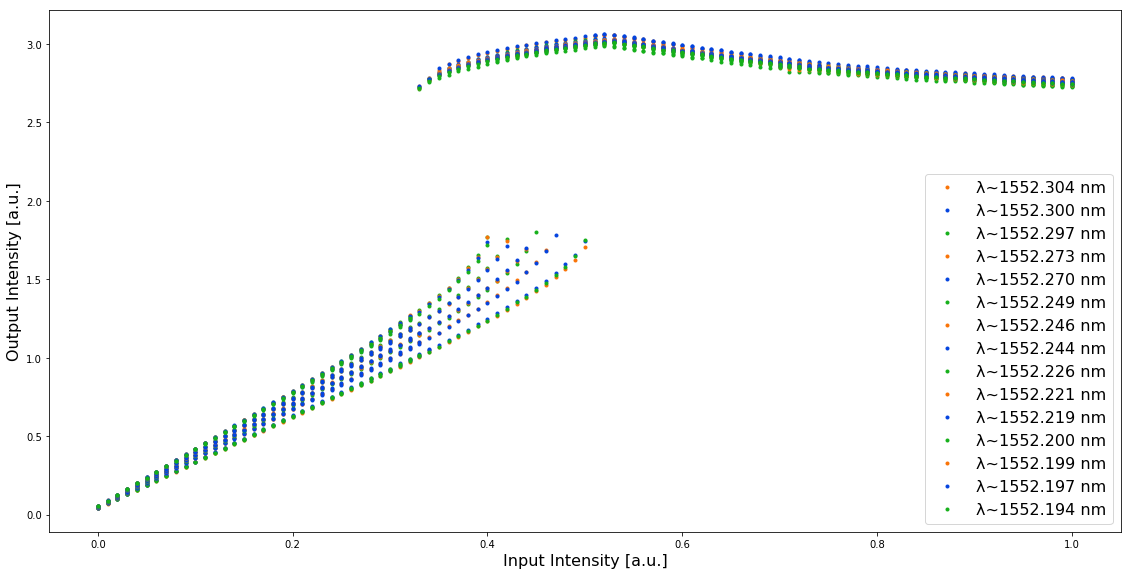

In [6]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

for ii, dd in d1.items():
    ax1.plot( dd[1][:,0], dd[1][:,1], label='λ~%.3f nm'%dd[0][0],#
              ls='', marker='.', c=colors[ii%3][0])

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

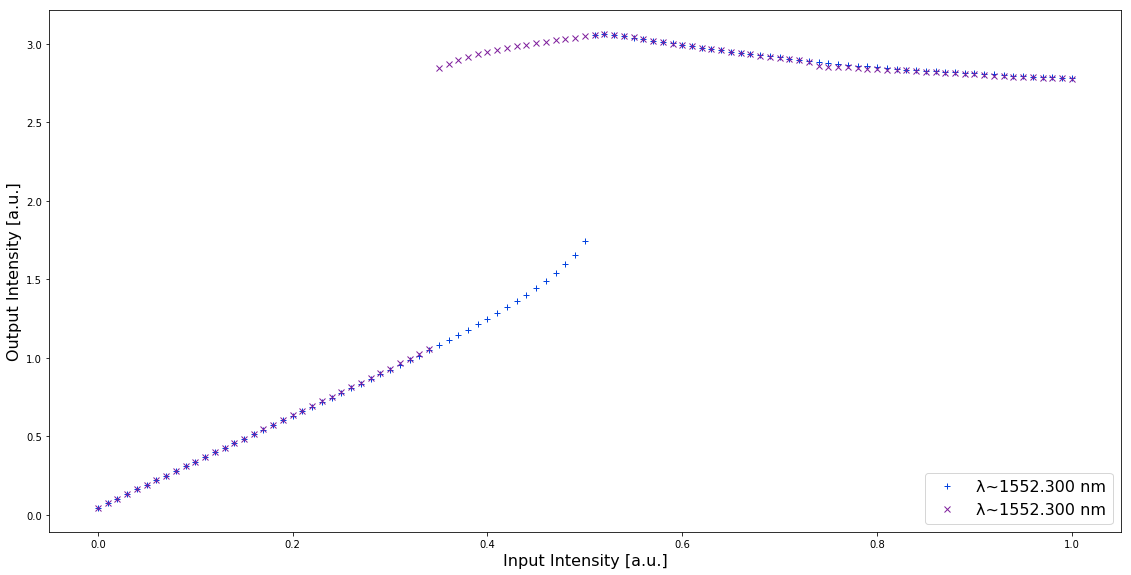

In [7]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ii = 1
ax1.plot( d1[ii][1][:d1[ii][0][4],0], d1[ii][1][:d1[ii][0][4],1], label='λ~%.3f nm'%d1[ii][0][0],#
            ls='', marker='+', c=colors[ii%3][0])
ax1.plot( d1[ii][1][-d1[ii][0][4]:,0], d1[ii][1][-d1[ii][0][4]:,1], label='λ~%.3f nm'%d1[ii][0][0],#
            ls='', marker='x', c=colors[ii%3][1])

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

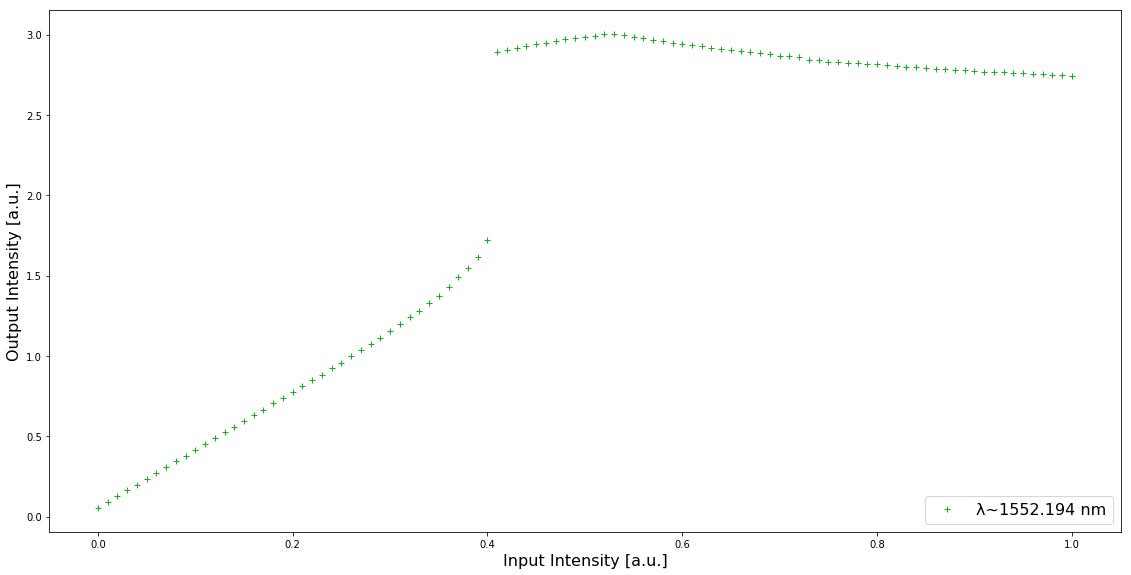

In [19]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ii = 14
for ii in [14]:
    ax1.plot( d1[ii][1][:d1[ii][0][4],0], d1[ii][1][:d1[ii][0][4],1], label='λ~%.3f nm'%d1[ii][0][0],#
            ls='', marker='+', c=colors[ii%3][0])
#ax1.plot( d1[ii][1][-d1[ii][0][4]:,0], d1[ii][1][-d1[ii][0][4]:,1], label='λ~%.3f nm'%d1[ii][0][0],#
#            ls='', marker='x', c=colors[ii%3][1])

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

In [67]:
def sigmoid(arg):
    return 1.0 / (1.0 + np.exp(-1.0 * arg))
def relu(arg):
    c = arg.copy()
    c[arg<0] = 0
    return c
def fguess(arg, a, b, c, d, g, x0, x1):
    return b*sigmoid(a*(arg-x0))+c*relu(arg)+d*relu(arg-x0)+g*relu(arg-x1)

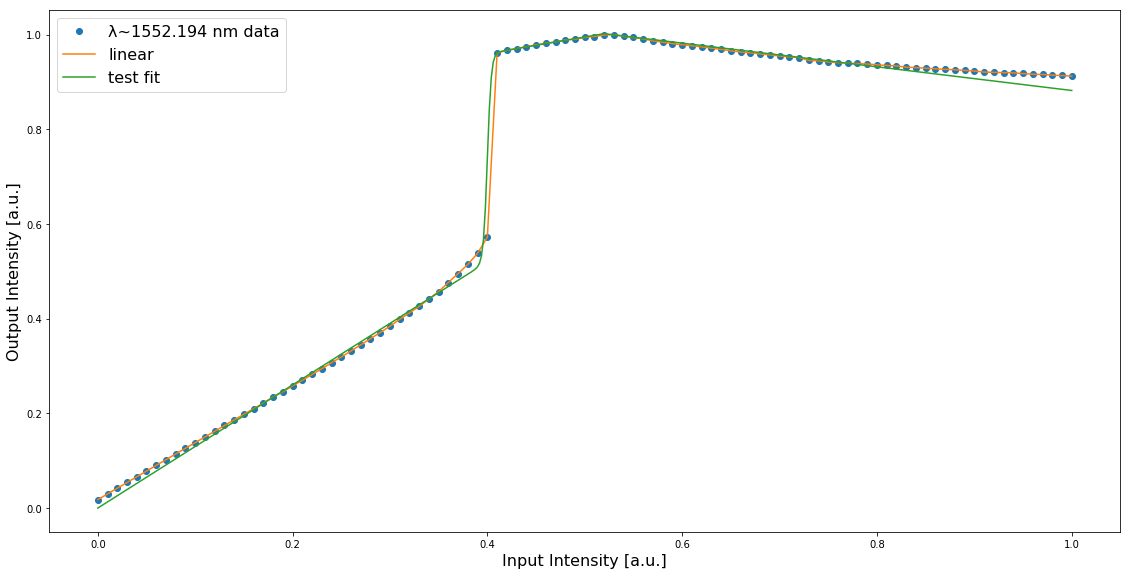

In [107]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ii = 14
xdata = d1[ii][1][:d1[ii][0][4],0]
ydata = d1[ii][1][:d1[ii][0][4],1]/max(d1[ii][1][:d1[ii][0][4],1])

f1 = interp1d(xdata, ydata)
#f2 = interp1d(xdata, ydata, kind='cubic')

x = np.linspace(0,1,501)
ax1.plot(xdata, ydata, 'o', label='λ~%.3f nm data'%d1[ii][0][0])
ax1.plot(x, f1(x), '-', label='linear')
#ax1.plot(x, f2(x), '--', label='cubic')
#ax1.plot( xdata, ydata, label='λ~%.3f nm'%d1[ii][0][0], ls='', marker='+', c=colors[ii%3][0])

ax1.plot( x, fguess(x, 500, 0.44, 1.3, -0.95, -0.6, .4, .52 ), ls='-', label='test fit')

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc='best', fontsize=16)

plt.show()
plt.close()

In [89]:
popt, pcov = curve_fit(fguess, xdata, ydata, [500, 0.44, 1.3, -0.95, -0.6, .4, .52])

a, b, c, d, g, x0, x1 = popt
print( ['{:.3f}'.format(i) for i in [500, 0.44, 1.3, -0.95, -0.6, .4, .52]])
print( ['{:.3f}'.format(i) for i in popt])
print('\n%.3f*sigmoid[%.3f*(x-%.3f)]+%.3f*relu[x]+%.3f*relu[x-%.3f]+%.3f*relu[x-%.3f]'#
       %(b, a, x0, c, d, x0, g, x1) )
        #b*sigmoid(a*(arg-x0))+c*relu(arg)+d*relu(arg-x0)+g*relu(arg-x1)

['500.000', '0.440', '1.300', '-0.950', '-0.600', '0.400', '0.520']
['689.652', '0.434', '1.310', '-0.975', '-0.518', '0.403', '0.502']

0.434*sigmoid[689.652*(x-0.403)]+1.310*relu[x]+-0.975*relu[x-0.403]+-0.518*relu[x-0.502]


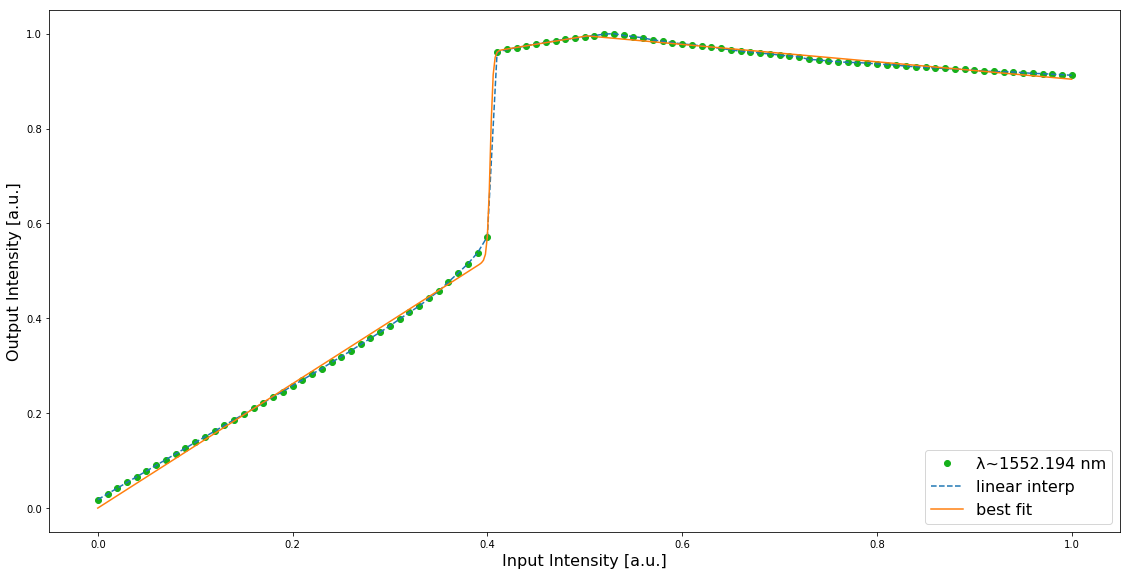

In [106]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ii = 14
xdata = d1[ii][1][:d1[ii][0][4],0]
ydata = d1[ii][1][:d1[ii][0][4],1]/max(d1[ii][1][:d1[ii][0][4],1])

ax1.plot( xdata, ydata, 'o', label='λ~%.3f nm'%d1[ii][0][0], c=colors[ii%3][0])
ax1.plot( x, f1(x), '--', label='linear interp',)
ax1.plot( x, fguess(x, *popt), '-', label='best fit')

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

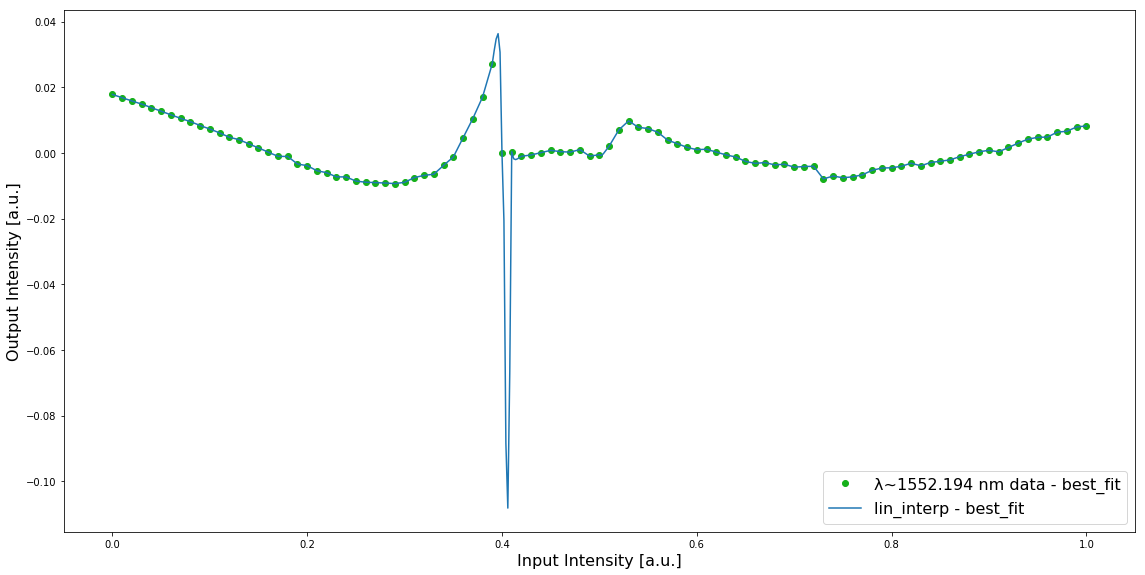

In [109]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ii = 14
xdata = d1[ii][1][:d1[ii][0][4],0]
ydata = d1[ii][1][:d1[ii][0][4],1]/max(d1[ii][1][:d1[ii][0][4],1])

ax1.plot( xdata, ydata-fguess(xdata,*popt), 'o', label='λ~%.3f nm data - best_fit'%d1[ii][0][0], c=colors[ii%3][0])
#ax1.plot( x, fguess(x, 500, 0.44, 1.3, -0.95, -0.6, .4, .52 ), ls='-')
plt.plot(x, f1(x)-fguess(x, *popt), '-', label='lin_interp - best_fit')

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()